# Malloggi-Vigna SEAI Project - Project Test Base



In [ ]:
!nvcc  --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


## Colab (ONLY) Environment Setup

reference:
https://keras.io/getting_started/

Aim of this project:
- Keras 3
- Tensorflow 2.16.1 (only one compatible with Keras3)

Colab preinstalled packages:
- Keras 2
- Tensorflow 2.15.0
- tf-keras 2.15.1 (previous keras version which was defined as tensorflow sub-package)

Therefore we need to update Tensorflow to the latest version available.


---
reference: https://github.com/keras-team/tf-keras

TF-Keras: the pure-TensorFlow implementation of Keras
This repository hosts the development of the TF-Keras library. It is a pure TensorFlow implementation of Keras, based on the legacy tf.keras codebase.

Note that the "main" version of Keras is now Keras 3 (formerly Keras Core), which is a multi-backend implementation of Keras, supporting JAX, PyTorch, and TensorFlow. Keras 3 is being developed at keras-team/keras.

In [ ]:
# tensorflow 2.15.0 is already installed, it must be uninstalled first
!pip uninstall tensorflow -y
!pip uninstall keras -y
!pip uninstall tf-keras -y
!pip install tensorflow
# !pip install --upgrade keras //automatically done installing tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
Found existing installation: tf_keras 2.15.1
Uninstalling tf_keras-2.15.1:
  Successfully uninstalled tf_keras-2.15.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  At

# KERAS 3 - Multi-backend High-level API
Keras is the high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning.

## Backend instantiation
Remember to configure the backend before importing Keras (and the other modules), as the backend cannot be changed once the package is imported.

In [1]:
# Available backend options are: "jax", "tensorflow", "torch".
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

## frameworks version

In [2]:
import sys
import tensorflow as tf
import jax
import jaxlib
import keras
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms
from jax import numpy as jnp

print(f"python3: {sys.version}")
print(f"tensorflow: {tf.__version__}")
print(f"jax: {jax.__version__}")
print(f"keras: {keras.__version__}")
print(f"numpy: {np.__version__}")
print(f"torch: {torch.__version__}")
print(f"torchvision: {torchvision.__version__}")
print(f"CUDA: {torch.version.cuda}")

cudnn = torch.backends.cudnn.version()
cudnn_major = cudnn // 1000
cudnn = cudnn % 1000
cudnn_minor = cudnn // 100
cudnn_patch = cudnn % 100
print( 'cuDNN:', '.'.join([str(cudnn_major),str(cudnn_minor),str(cudnn_patch)]) )

2024-06-12 10:31:22.011179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 10:31:22.907278: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


python3: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
tensorflow: 2.16.1
jax: 0.4.26
keras: 3.3.3
numpy: 1.26.3
torch: 2.3.0+cu118
torchvision: 0.18.0+cu118
CUDA: 11.8
cuDNN: 8.9.7


## GPU support

In [3]:
from tensorflow.python.client import device_lib

# Hide GPU from visible devices (force CPU-ONLY processing)
#os.environ['CUDA_VISIBLE_DEVICES'] = '' OR #tf.config.set_visible_devices([], 'GPU')

gpus = tf.config.list_physical_devices('GPU')
print([d.name for d in gpus])

# do not uncomment, check https://github.com/tensorflow/tensorflow/issues/9374
# print(device_lib.list_local_devices())

['/physical_device:GPU:0']


2024-06-12 10:31:30.038049: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 10:31:30.164305: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 10:31:30.164357: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Currently Memory Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Currently Memory Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
NVIDIA GeForce GTX 1060 6GB
Currently Memory Allocated: 0.0 GB
Currently Memory Cached:    0.0 GB


# Code To Test: LeNet-5 Architecture (CNN)


---
reference:

pytorch & tensorflow 2.15 (compatible with keras2) examples: https://towardsdatascience.com/tensorflow-vs-pytorch-convolutional-neural-networks-cnn-dd9ca6ddafce

pytorch (compatible with keras3) example: https://medium.com/@shivansh.kaushik/keras-core-3-0-the-multi-backend-beast-ac46609adb98

keras example: https://keras.io/examples/vision/mnist_convnet/


## PyTorch LeNet-5 Architecture (CNN)

Step 0: Parameters setting and Libraries import

In [5]:
batch_size_pt = 60000
epochs_pt = 10

Step 1: Getting, Splitting and Loading the Data

In [6]:
#PyTorch - Getting and Splitting the Dataset
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset_pt = torchvision.datasets.FashionMNIST(root='./data/',
                                                     train=True,
                                                     transform=transforms,
                                                     download=True)
test_dataset_pt = torchvision.datasets.FashionMNIST(root='.data/',
                                                     train=False,
                                                     transform=transforms,
                                                     download=True)

#PyTorch - Loading the Data
train_loader = torch.utils.data.DataLoader(dataset=train_dataset_pt,
                                           batch_size=batch_size_pt,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset_pt,
                                           #batch_size=32,
                                           shuffle=False)

100%|██████████████████████████████████████████████████████████████████| 26421880/26421880 [00:04<00:00, 5851203.22it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 1634687.48it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:01<00:00, 3962986.36it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 5290927.96it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████████████████████████████████████████████████████████████| 26421880/26421880 [00:04<00:00, 6191542.12it/s]


Extracting .data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 1378193.83it/s]


Extracting .data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:00<00:00, 5907362.09it/s]


Extracting .data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 4746598.59it/s]

Extracting .data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



Step 2: Preparing the Data

Step 3: Building the Model

In [ ]:
#PyTorch - Building the Model
model_pt = nn.Sequential(
    # Layer1 = Conv1
    nn.Conv2d(1, 6, (5, 5), stride=1, padding=2),
    nn.ReLU(),
    nn.AvgPool2d((2, 2), stride=2),

    # Layer2 = Conv2
    nn.Conv2d(6, 16, (5, 5), stride=1, padding=0),
    nn.ReLU(),
    nn.AvgPool2d((2, 2), stride=2),

    nn.Flatten(),
    # Layer3 = Conv3
    nn.Linear(400,120),
    nn.ReLU(),
    nn.Linear(120,84),
    nn.ReLU(),
    nn.Linear(84,10),
    nn.Softmax(dim=1)
)
model_pt.to(device)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): Softmax(dim=1)
)

Step 4: Training the Model

reference:
https://medium.com/@soumensardarintmain/manage-cuda-cores-ultimate-memory-management-strategy-with-pytorch-2bed30cab1#:~:text=The%20recommended%20way%20is%20to,first%20and%20then%20call%20torch.

---


In [ ]:
import time
import gc

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model_pt.parameters())

times = []

#PyTorch - Training the Model
for e in range(epochs_pt):
    start_epoch = time.time()

    # define the loss value after the epoch
    losss = 0.0
    number_of_sub_epoch = 0

    # loop for every training batch (one epoch)
    for images, labels in train_loader:

        images = images.to(device)
        labels = labels.to(device)
        #create the output from the network
        out = model_pt(images)
        # count the loss function
        loss = criterion(out, labels)
        # in pytorch you have assign the zero for gradien in any sub epoch
        optim.zero_grad()
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        # add new value to the main loss
        losss += loss.item()
        number_of_sub_epoch += 1


    #torch.cuda.synchronize()
    end_epoch = time.time()
    print("Epoch {} \t Time: {:.3f} sec \t Loss: {:.3f}".format(e, (end_epoch-start_epoch), losss / number_of_sub_epoch))
    elapsed = end_epoch - start_epoch
    times.append(elapsed)

    #Cache Cleaning
    #The recommended way is to delete the local variables (using del) first
    del images
    del labels
    del losss
    del out
    # Then clean the cache
    torch.cuda.empty_cache()
    # then collect the garbage
    gc.collect()

tot_time_pt = sum(times)
avg_time_pt = sum(times)/epochs_pt
print("Backend: {} \t Framework: {}".format(os.environ["KERAS_BACKEND"], "pytorch"))
print("batch size: {:.3f}".format(batch_size_pt))
print("total time: {:.3f}".format(tot_time_pt))
print("average time: {:.3f}".format(avg_time_pt))

Exception ignored in: <function _xla_gc_callback at 0x79af373deb90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 0 	 Time: 44.413 sec 	 Loss: 2.303


Step 5: Evaluating the Model

In [ ]:
#PyTorch - Comparing the Results
correct = 0
total = 0
model_pt.eval()
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model_pt(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the {} test images: {}% with PyTorch'.format(total, 100 * correct // total))

## Keras-3 LeNet-5 Architecture (CNN)

Step 1: Getting, Splitting and Loading the Data

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
#TensorFlow - Getting and Splitting the Dataset
fashion_mnist = keras.datasets.fashion_mnist
#TensorFlow - Loading the Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Step 2: Prepare the Data

In [6]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Step 3: Building the Model

In [7]:
#Keras - Building the Model
model_ks = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(6, kernel_size=(5, 5), strides=1, padding="same", activation="relu"),
        keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
        keras.layers.Conv2D(16, kernel_size=(5, 5), strides=1, padding="same", activation="relu"),
        keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
        keras.layers.Flatten(),
        keras.layers.Dense(120, activation="relu"),
        keras.layers.Dense(84, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax")
    ]
)
#Keras - Visualizing the Model
model_ks.summary()

2024-06-12 10:31:52.403245: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 10:31:52.403368: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 10:31:52.403404: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 10:31:52.572548: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 10:31:52.572645: I external/local_xla/xla/stream_executor

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 7, 7, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,786 (421.04 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

Step 4: Training the Model

In [10]:
#Keras - Training the Model
model_ks.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

batch_size_ks = 128
validation_split_ks = 0.1
epochs_ks = 10

model_ks.fit(x_train, y_train, batch_size=batch_size_ks, epochs=epochs_ks, validation_split=validation_split_ks)

Epoch 1/10


I0000 00:00:1718180973.179971     449 service.cc:145] XLA service 0x7f5368004400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718180973.180053     449 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-06-12 10:29:33.483479: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-12 10:29:34.132757: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 45/422 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4138 - loss: 1.6935

I0000 00:00:1718180979.831580     449 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6823 - loss: 0.8939 - val_accuracy: 0.8142 - val_loss: 0.5016
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8377 - loss: 0.4510 - val_accuracy: 0.8600 - val_loss: 0.3900
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8596 - loss: 0.3863 - val_accuracy: 0.8648 - val_loss: 0.3737
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8749 - loss: 0.3475 - val_accuracy: 0.8747 - val_loss: 0.3461
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8816 - loss: 0.3256 - val_accuracy: 0.8732 - val_loss: 0.3351
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8896 - loss: 0.2991 - val_accuracy: 0.8840 - val_loss: 0.3126
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8930 - loss: 0.2845 - val_accuracy: 0.8817 - val_loss: 0.3206
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8964 - loss: 0.2758 - val_accuracy: 0.8885 - val

Step 5: Evaluating the Model

In [11]:
score = model_ks.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.29642748832702637
Test accuracy: 0.890999972820282


## Tensorflow LeNet-5 Architecture (CNN)

Step 1: Getting, Splitting and Loading the Data

In [20]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
learn_rate = 0.005
epochs_tf = 10
batch_size_tf = 1000

#TensorFlow - Getting and Splitting the Dataset
fashion_mnist = keras.datasets.fashion_mnist
#TensorFlow - Loading the Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Step 2: Prepare the Data

In [21]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Step 3: Building the Model

In [22]:
class Model_tf(tf.Module):
    def __init__(self, name="LeNet_model_tf"):
        super().__init__(name=name)

        # Variables definition
        self.conv1 = tf.Variable(tf.random.normal([5, 5, input_shape[-1], 6]), name='conv1')
        self.conv2 = tf.Variable(tf.random.normal([5, 5, 6, 16]), name='conv2')
        self.fc1 = tf.Variable(tf.random.normal([784, 120]), name='fc1')
        self.fc2 = tf.Variable(tf.random.normal([120, 84]), name='fc2')
        self.fc3 = tf.Variable(tf.random.normal([84, num_classes]), name='fc3')

        self.bias1 = tf.Variable(tf.zeros([6]), name='bias1')
        self.bias2 = tf.Variable(tf.zeros([16]), name='bias2')
        self.bias3 = tf.Variable(tf.zeros([120]), name='bias3')
        self.bias4 = tf.Variable(tf.zeros([84]), name='bias4')
        self.bias5 = tf.Variable(tf.zeros([num_classes]), name='bias5')

    @tf.function
    def __call__(self, x):
        # 1st layer: Convolution
        x = tf.nn.conv2d(x, self.conv1, strides=[1, 1, 1, 1], padding='SAME')
        x = tf.nn.bias_add(x, self.bias1)
        x = tf.nn.relu(x)
        # 1st layer: Pooling
        x = tf.nn.avg_pool2d(x, ksize=2, strides=2, padding='SAME')

        # 2nd layer: Convolution
        x = tf.nn.conv2d(x, self.conv2, strides=[1, 1, 1, 1], padding='SAME')
        x = tf.nn.bias_add(x, self.bias2)
        x = tf.nn.relu(x)
        # 2nd layer: Pooling
        x = tf.nn.avg_pool2d(x, ksize=2, strides=2, padding='SAME')

        # flattening
        x = tf.reshape(x, [-1, 784])

        # 3rd layer: Dense
        x = tf.nn.relu(tf.add(tf.matmul(x, self.fc1), self.bias3))
        # 4th layer: Dense
        x = tf.nn.relu(tf.add(tf.matmul(x, self.fc2), self.bias4))
        # 5th layer: Dense
        x = tf.add(tf.matmul(x, self.fc3), self.bias5)
        return tf.nn.softmax(x)


model_tf = Model_tf(name="LeNet5_model_tf")


In [23]:
def loss_fn(y_true, y_pred):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

optimizer = tf.optimizers.Adam()

Step 4: Training the Model

In [24]:
@tf.function
def train_step(model, X, y):
    with tf.GradientTape(persistent=True) as tape:
        y_model = model(X)
        loss = loss_fn(y, y_model)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

def test_step(model, X, y, step=None):
    correct_predictions = tf.equal(y_test, model_tf(x_test))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32)) # Recast the Boolean as float32 first. Then calculate the mean.
    accuracy_value = accuracy.numpy()
    print("Epoch = {}   ,   Accuracy = {:5.3f}".format(i, accuracy_value))


# Training.
for i in range(epochs_tf):
    idx_rnd = np.random.choice(range(x_train.shape[0]), batch_size_tf, replace=False)                          # Random sampling w/o replacement for the batch indices.
    batch_x = x_train[idx_rnd, :] # Sample a batch!
    batch_y = y_train[idx_rnd]
    train_step(model_tf, batch_x, batch_y)

    if i%10 == 0:
      test_step(model_tf, batch_x, batch_y, i)


Epoch = 0   ,   Accuracy = 0.816


Step 5: Evaluating the Model

In [25]:
test_step(model_tf, batch_x, batch_y)

Epoch = 9   ,   Accuracy = 0.816


## Jax-Flax LeNet-5 Architecture (CNN)

---

reference:
https://github.com/8bitmp3/JAX-Flax-Tutorial-Image-Classification-with-Line

https://www.machinelearningnuggets.com/jax-cnn/


!pip install --upgrade -q pip jax jaxlib flax optax tensorflow-datasets

Step 1: Getting, Splitting and Loading the Data

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

import jax
from jax import random
from jax import numpy as jnp

import optax
from tqdm.auto import tqdm

import flax
from flax import linen as nn
from flax.training import train_state

In [2]:
jax.local_devices()

[cuda(id=0)]

In [3]:
# Model / data parameters
learn_rate = 0.005
epochs_JAX = 10
batch_size_JAX = 1000

IMG_SIZE = 28

Step 2: Prepare the Data

In [5]:
# Save the images to the corresponding directories, splitting training, validation and test set
def save_images(images, labels, base_dir):
    for idx, (image, label) in enumerate(zip(images, labels)):
        label_dir = os.path.join(base_dir, str(label))
        file_path = os.path.join(label_dir, f'{idx}.png')
        keras.preprocessing.image.save_img(file_path, np.expand_dims(image, axis=-1))

def directory_contains_two_nonempty_subdirs(directory):
    if not os.path.exists(directory):
        print(f"Directory '{directory}' does not exist.")
        return False
    
    subdirs = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
    
    if len(subdirs) != 2:
        print(f"Directory '{directory}' does not contain exactly 2 subdirectories.")
        return False
    
    nonempty_subdirs_count = 0
    for subdir in subdirs:
        subdir_path = os.path.join(directory, subdir)
        if any(os.listdir(subdir_path)):
            nonempty_subdirs_count += 1
    
    if nonempty_subdirs_count == 2:
        print(f"Directory '{directory}' contains exactly 2 non-empty subdirectories.")
        return True
    else:
        print(f"Directory '{directory}' does not contain 2 non-empty subdirectories.")
        return False

base_dir = 'mnist_images'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

if (not directory_contains_two_nonempty_subdirs(base_dir)):
    
    ## Preparing the dataset
    (train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
    
    # Create directories for the dataset
    
    for i in range(10):
        os.makedirs(os.path.join(train_dir, str(i)), exist_ok=True)
        os.makedirs(os.path.join(test_dir, str(i)), exist_ok=True)

    # Save train and test images
    save_images(train_images, train_labels, train_dir)
    save_images(test_images, test_labels, test_dir)

# Use image_dataset_from_directory to create the dataset

training_set = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=5603,
    image_size=(IMG_SIZE, IMG_SIZE),  # MNIST images are 28x28
    color_mode='grayscale',  # MNIST images are grayscale
    batch_size=batch_size_JAX
)

validation_set = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=5603,
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=batch_size_JAX
)

test_set = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=batch_size_JAX
)


Directory 'mnist_images' contains exactly 2 non-empty subdirectories.
Found 60000 files belonging to 10 classes.
Using 48000 files for training.
Found 60000 files belonging to 10 classes.
Using 12000 files for validation.
Found 10000 files belonging to 10 classes.


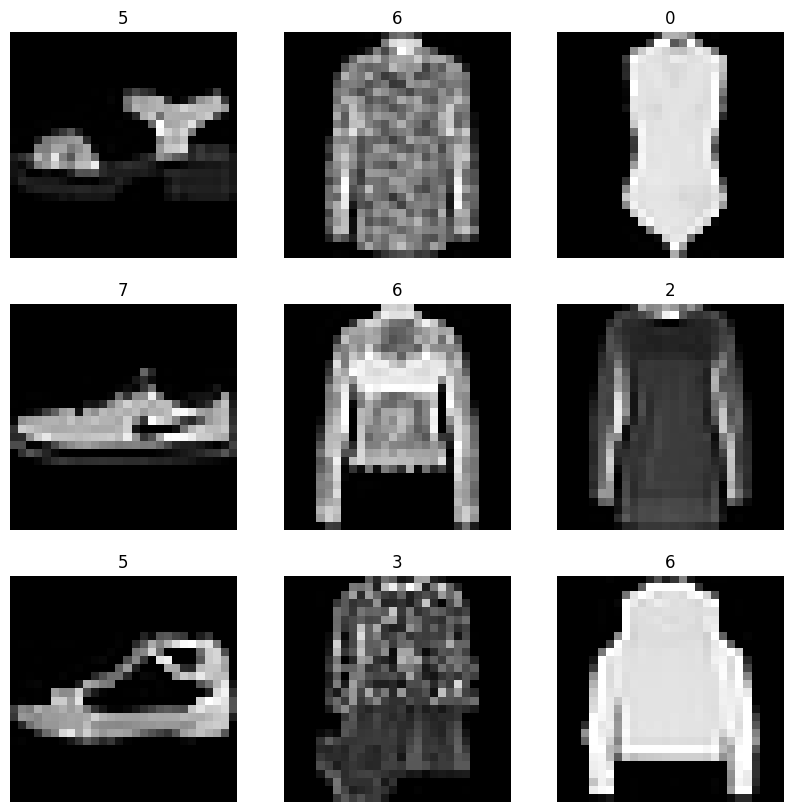

In [6]:
#Plot some training samples
def plot_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(50):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
            plt.title(int(labels[i]))
            plt.axis("off")
    plt.show()

# Plot the images
plot_images(training_set)

In [7]:
#Pre processing images resize and rescale
resize_and_rescale = keras.Sequential(
    [
        keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
        keras.layers.Rescaling(1.0 / 255),
    ]
)

#tf.data.AUTOTUNE
AUTOTUNE = -1

#Method to apply pre-processing to all the data
def prepare(ds, shuffle=False):
    # Rescale and resize all datasets.
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

#Method to convert dataset into batch of dataset to be used in next phases.
def get_batches(ds):
    data = ds.prefetch(1)
    # tfds.dataset_as_numpy converts the tf.data.Dataset into an iterable of NumPy arrays
    return tfds.as_numpy(data)

#Method that contains prepare+get_batches to produce three datasets
def prepareBatchDatasets(training_set,validation_set,test_set):
    train_ds = prepare(training_set, shuffle=True)
    val_ds = prepare(validation_set)
    evaluation_set = prepare(test_set)
    
    training_data = get_batches(train_ds)
    validation_data = get_batches(val_ds)
    evaluation_data = get_batches(evaluation_set)
    return training_data,validation_data,evaluation_data


training_data,validation_data,evaluation_data=prepareBatchDatasets(training_set,validation_set,test_set)

Step 3: Building the Model

In [8]:
# Define the LeNet architecture
class LeNet(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Conv(features=6, kernel_size=(5, 5), strides=(1, 1), padding='SAME')(x)
        x = nn.tanh(x)
        x = nn.avg_pool(x, window_shape=(2, 2), strides=(2, 2), padding='VALID')
        x = nn.Conv(features=16, kernel_size=(5, 5), strides=(1, 1), padding='VALID')(x)
        x = nn.tanh(x)
        x = nn.avg_pool(x, window_shape=(2, 2), strides=(2, 2), padding='VALID')
        x = x.reshape((x.shape[0], -1))  # Flatten
        x = nn.Dense(features=120)(x)
        x = nn.tanh(x)
        x = nn.Dense(features=84)(x)
        x = nn.tanh(x)
        x = nn.Dense(features=10)(x)
        return x
        
class_names = training_set.class_names
num_classes = len(class_names)

In [9]:
rng = random.PRNGKey(0)
rng, init_rng = random.split(rng)

model = LeNet()
inp = jnp.ones([1, IMG_SIZE, IMG_SIZE, 1])

# Initialize the model
params = model.init(init_rng, inp)

model.apply(params, inp)

Array([[ 0.34913898,  0.14055441,  0.22010076, -0.05485532,  0.27679592,
         0.09151288,  0.2330003 , -0.07789814, -0.19058019,  0.42997396]],      dtype=float32)

In [10]:
#Definition of the optimizer and update the model state

optimizer = optax.adam(
    learning_rate=learn_rate
) 

model_state = train_state.TrainState.create(
    apply_fn=model.apply, params=params, tx=optimizer
)

#Method use to calculate loss and accuracy
def calculate_loss_acc(state, params, batch):
    data_input, labels = batch
    # Obtain the logits and predictions of the model for the input data
    logits = state.apply_fn(params, data_input)
    # Calculate the loss and accuracy
    labels_onehot = jax.nn.one_hot(labels, num_classes=num_classes)
    #uncomment the line below for multiclass classification
    # loss = optax.softmax_cross_entropy(logits, labels_onehot).mean()
    loss = optax.sigmoid_binary_cross_entropy(logits, labels_onehot).mean()
    # comment the line above for multiclass problems
    acc = jnp.mean(jnp.argmax(logits, -1) == labels)
    return loss, acc

In [11]:
#Test if it works
batch = next(iter(training_data))
calculate_loss_acc(model_state, model_state.params, batch)

(Array(0.74572814, dtype=float32), Array(0.051, dtype=float32))

Step 4: Training the Model

In [12]:
@jax.jit  # Jit the function for efficiency
def train_step(state, batch):
    # Gradient function
    grad_fn = jax.value_and_grad(
        calculate_loss_acc,  # Function to calculate the loss
        argnums=1,  # Parameters are second argument of the function
        has_aux=True,  # Function has additional outputs, here accuracy
    )
    
    # Determine gradients for current model, parameters and batch
    (loss, acc), grads = grad_fn(state, state.params, batch)
    
    # Perform parameter update with gradients and optimizer
    state = state.apply_gradients(grads=grads)
   
    return state, loss, acc

@jax.jit  # Jit the function for efficiency
def eval_step(state, batch):
    # Determine the accuracy
    loss, acc = calculate_loss_acc(state, state.params, batch)
    return loss, acc


training_accuracy = []
training_loss = []

testing_loss = []
testing_accuracy = []


def train_model(state, train_loader, test_loader, num_epochs=30):
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        train_batch_loss, train_batch_accuracy = [], []
        val_batch_loss, val_batch_accuracy = [], []

        for train_batch in train_loader:
            state, loss, acc = train_step(state, train_batch)
            train_batch_loss.append(loss)
            train_batch_accuracy.append(acc)

        for val_batch in test_loader:
            val_loss, val_acc = eval_step(state, val_batch)

            val_batch_loss.append(val_loss)
            val_batch_accuracy.append(val_acc)

        # Loss for the current epoch
        epoch_train_loss = np.mean(train_batch_loss)
        epoch_val_loss = np.mean(val_batch_loss)

        # Accuracy for the current epoch
        epoch_train_acc = np.mean(train_batch_accuracy)
        epoch_val_acc = np.mean(val_batch_accuracy)

        testing_loss.append(epoch_val_loss)
        testing_accuracy.append(epoch_val_acc)

        training_loss.append(epoch_train_loss)
        training_accuracy.append(epoch_train_acc)

        print(
            f"Epoch: {epoch + 1}, loss: {epoch_train_loss:.2f}, acc: {epoch_train_acc:.2f} val loss: {epoch_val_loss:.2f} val acc {epoch_val_acc:.2f} "
        )

    return state

In [13]:
trained_model_state = train_model(
    model_state, training_data, validation_data, num_epochs=epochs_JAX
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1, loss: 0.23, acc: 0.51 val loss: 0.13 val acc 0.73 
Epoch: 2, loss: 0.11, acc: 0.76 val loss: 0.09 val acc 0.80 
Epoch: 3, loss: 0.09, acc: 0.81 val loss: 0.08 val acc 0.83 
Epoch: 4, loss: 0.08, acc: 0.84 val loss: 0.08 val acc 0.84 
Epoch: 5, loss: 0.07, acc: 0.85 val loss: 0.07 val acc 0.86 
Epoch: 6, loss: 0.07, acc: 0.86 val loss: 0.07 val acc 0.87 
Epoch: 7, loss: 0.07, acc: 0.87 val loss: 0.06 val acc 0.88 
Epoch: 8, loss: 0.06, acc: 0.87 val loss: 0.06 val acc 0.87 
Epoch: 9, loss: 0.06, acc: 0.88 val loss: 0.06 val acc 0.88 
Epoch: 10, loss: 0.06, acc: 0.89 val loss: 0.06 val acc 0.88 


Step 5: Evaluating the Model

<Axes: >

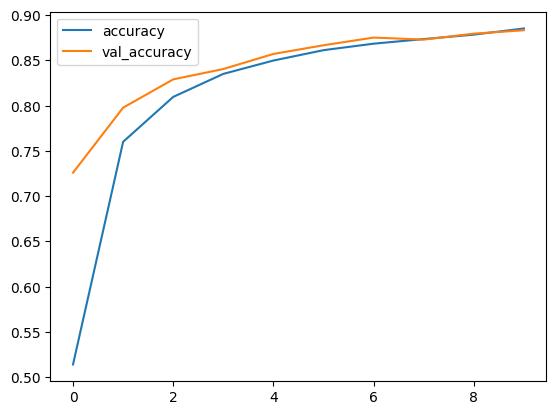

In [15]:
metrics_df = pd.DataFrame(np.array(training_accuracy), columns=["accuracy"])
metrics_df["val_accuracy"] = np.array(testing_accuracy)
metrics_df["loss"] = np.array(training_loss)
metrics_df["val_loss"] = np.array(testing_loss)
metrics_df.head()

metrics_df[["accuracy", "val_accuracy"]].plot()

In [16]:
def evaluate_model(state, eval_loader):
    eval_losses, eval_accs = [], []
    for eval_batch in eval_loader:
        loss, acc = eval_step(state, eval_batch)
        eval_losses.append(loss)
        eval_accs.append(acc)
    mean_loss = np.mean(eval_losses)
    mean_acc = np.mean(eval_accs)
    return mean_loss, mean_acc

test_loss, test_acc = evaluate_model(trained_model_state, evaluation_data)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc * 100:.2f}%")

Test Loss: 0.0638, Test Accuracy: 86.98%


In [ ]:
# from flax.training import checkpoints

# checkpoints.save_checkpoint(
#     ckpt_dir="/content/my_checkpoints/",  # Folder to save checkpoint in
#     target=trained_model_state,  # What to save. To only save parameters, use model_state.params
#     step=100,  # Training step or other metric to save best model on
#     prefix="my_model",  # Checkpoint file name prefix
#     overwrite=True,  # Overwrite existing checkpoint files
# )

# loaded_model_state = checkpoints.restore_checkpoint(
#     ckpt_dir="/content/my_checkpoints/",  # Folder with the checkpoints
#     target=model_state,  # (optional) matching object to rebuild state in
#     prefix="my_model",  # Checkpoint file name prefix
# )

In [40]:
##Utility to delete directly the dataset folder
import os

# def delete_directory_contents(directory):
#     # List all files and directories in the directory
#     for item in os.listdir(directory):
#         item_path = os.path.join(directory, item)
#         # Check if the item is a file
#         if os.path.isfile(item_path):
#             # Remove the file
#             os.remove(item_path)
#         # Check if the item is a directory
#         elif os.path.isdir(item_path):
#             # Remove the directory and its contents recursively
#             delete_directory_contents(item_path)
#             # Remove the empty directory
#             os.rmdir(item_path)

# # Example usage:
# directory_path = 'mnist_images'
# delete_directory_contents(directory_path)